In [8]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import pandas as pd

import matplotlib.pyplot as plt
import csv

In [9]:
F = 6
L = 6
N = (F + L) * 100

## Excercise 1 - generate data
    Compile code_1.stan and code_2.stan
    Generate data for rest of excercises.


In [10]:
model1 = CmdStanModel(stan_file='code_1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [11]:
data1 = dict(N = N)

In [12]:
result1 = model1.sample(data = data1, chains = 4)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:   1 / 1000 [  0%]  (Sampling)



chain 1 |█▎        | 00:00 Iteration: 100 / 1000 [ 10%]  (Sampling)


chain 1 |█▊        | 00:00 Iteration: 200 / 1000 [ 20%]  (Sampling)


chain 1 |██▎       | 00:01 Iteration: 300 / 1000 [ 30%]  (Sampling)


chain 1 |██▋       | 00:01 Iteration: 400 / 1000 [ 40%]  (Sampling)


chain 1 |███▏      | 00:01 Iteration: 500 / 1000 [ 50%]  (Sampling)


chain 1 |███▋      | 00:01 Iteration: 600 / 1000 [ 60%]  (Sampling)


chain 1 |████      | 00:02 Iteration: 700 / 1000 [ 70%]  (Sampling)


chain 1 |████▌     | 00:02 Iteration: 800 / 1000 [ 80%]  (Sampling)


chain 1 |█████     | 00:02 Iteration: 900 / 1000 [ 90%]  (Sampling)

chain 1 |██████████| 00:02 Sampling completed                      
chain 2 |██████████| 00:02 Sampling completed

chain 3 |██████████| 00:02 Sampling completed
chain 4 |██████████| 00:02 Sampling completed                  


INFO:cmdstanpy:CmdStan done processing.


In [13]:
df1 = result1.draws_pd()
df1

,lp__,accept_stat__,theta,y[1],y[2],y[3],y[4],y[5],y[6],y[7],...,y[1191],y[1192],y[1193],y[1194],y[1195],y[1196],y[1197],y[1198],y[1199],y[1200]
0,0.0,0.0,0.01,-1.641460,1.942080,1.093900,0.617588,-1.036350,1.073890,0.323552,...,1.102000,-0.512487,0.761088,0.324303,0.427594,-0.690187,-0.132516,-0.859479,0.120667,0.670458
1,0.0,0.0,0.01,-1.511030,0.340038,1.236530,0.088780,1.737370,0.022501,0.546759,...,-0.828935,0.910007,-1.022780,1.208090,-1.158560,0.507596,0.152656,0.300391,1.328390,-0.403980
2,0.0,0.0,0.01,0.284290,-1.397300,0.488372,0.840911,0.350399,-0.240514,0.224209,...,0.046089,0.708998,0.296185,-0.472466,-0.755913,1.758180,0.472642,-0.361100,0.061737,-0.735696
3,0.0,0.0,0.01,-0.796027,-0.884588,0.028276,-0.267610,0.041797,0.042669,-0.634606,...,1.692810,0.579003,-0.004933,-1.205560,-1.588230,1.347910,0.682852,0.064213,-0.843629,1.775800
4,0.0,0.0,0.01,0.406414,1.754950,0.201772,1.038640,0.481891,0.212499,-0.033420,...,-0.403676,-1.003290,-0.132046,-0.367120,1.017450,1.459120,-0.838600,-0.488353,1.784820,-0.909052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.0,0.0,0.01,-0.346979,1.012430,0.972315,-0.765653,-0.489116,-0.739422,-11.675000,...,2.171740,1.302080,-0.605440,-0.210574,-1.124070,-0.953947,0.257647,-0.148483,-0.459052,-0.514281
3996,0.0,0.0,0.01,-0.906152,-0.104564,-0.199963,0.888352,0.242471,-0.083040,-1.377320,...,-0.493318,0.801628,0.967061,-1.568390,0.170992,-2.212120,1.256670,0.111056,0.064029,0.384036
3997,0.0,0.0,0.01,0.184572,-0.734170,-1.043940,0.904750,0.633546,0.481126,-0.784177,...,-0.668245,-0.244994,1.480820,-0.384875,1.106490,-0.603581,2.049820,-0.127502,-0.398855,-0.080093
3998,0.0,0.0,0.01,0.013645,1.414990,1.158130,1.055230,-1.408230,0.283886,-0.420265,...,-0.787403,-0.662142,-1.124750,-1.591910,0.191822,0.121853,-0.301186,-1.868580,-0.280428,-1.988300


In [14]:
model2 = CmdStanModel(stan_file='code_2.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [15]:
data2 = dict(N = N)

In [16]:
result2 = model2.sample(data = data2, chains = 4)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:01 Iteration:   1 / 1000 [  0%]  (Sampling)


chain 1 |█▎        | 00:02 Iteration: 100 / 1000 [ 10%]  (Sampling)


chain 1 |█▊        | 00:03 Iteration: 200 / 1000 [ 20%]  (Sampling)


chain 1 |██▎       | 00:04 Iteration: 300 / 1000 [ 30%]  (Sampling)


chain 1 |██▋       | 00:05 Iteration: 400 / 1000 [ 40%]  (Sampling)


chain 1 |███▏      | 00:06 Iteration: 500 / 1000 [ 50%]  (Sampling)


chain 1 |███▋      | 00:07 Iteration: 600 / 1000 [ 60%]  (Sampling)

chain 1 |████      | 00:08 Iteration: 700 / 1000 [ 70%]  (Sampling)


chain 1 |████▌     | 00:09 Iteration: 800 / 1000 [ 80%]  (Sampling)


chain 1 |█████     | 00:10 Iteration: 900 / 1000 [ 90%]  (Sampling)
chain 1 |██████████| 00:10 Sampling completed                      
chain 2 |██████████| 00:10 Sampling completed
chain 3 |██████████| 00:10 Sampling completed                      


chain 4 |██████████| 00:10 Sampling comp


INFO:cmdstanpy:CmdStan done processing.


In [17]:
df2 = result2.draws_pd()
df2

,lp__,accept_stat__,"X[1,1]","X[2,1]","X[3,1]","X[4,1]","X[5,1]","X[6,1]","X[7,1]","X[8,1]",...,y[1191],y[1192],y[1193],y[1194],y[1195],y[1196],y[1197],y[1198],y[1199],y[1200]
0,0.0,0.0,1.242890,-0.384944,0.415544,0.926241,-1.008380,-1.684120,-1.877250,-0.871815,...,-0.030962,-3.137880,0.590810,1.820130,2.338720,-0.996793,-3.950830,-1.119010,0.871864,-0.552820
1,0.0,0.0,-0.519885,-0.188337,-0.861866,-1.286440,-1.312120,-0.318618,-0.417345,0.593399,...,0.607834,0.797525,-1.928410,-2.195610,0.793535,2.832140,-0.600671,-3.933840,-0.123085,-3.599060
2,0.0,0.0,-0.349445,-1.127810,0.266553,-0.691748,-0.464778,-0.351046,0.577062,-1.144320,...,-0.997668,2.186470,0.108812,0.337257,1.290210,-3.066280,-4.121310,0.209173,1.170410,2.998990
3,0.0,0.0,0.286109,0.173878,1.763110,-1.236700,-1.675390,0.555619,2.304740,-0.050862,...,-2.403470,-3.194380,-1.237470,1.565390,-2.592800,-5.393520,2.394570,-1.144340,1.788200,-3.422800
4,0.0,0.0,0.628691,-0.240109,0.344379,-0.556037,1.995700,0.119196,-0.882271,0.203027,...,4.131920,-0.048496,-0.323851,7.081130,0.748272,2.038040,-0.782323,-1.371940,1.976050,3.561500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.0,0.0,1.266170,0.169703,-1.886320,-1.925050,-0.371406,0.453343,-2.229450,-1.349070,...,-4.269090,-0.033521,-0.782732,1.316810,1.738960,0.521285,1.853240,-2.312110,1.026650,1.939370
3996,0.0,0.0,-0.942777,1.753360,0.142734,1.280460,-1.365780,0.456285,0.682087,-0.875725,...,-3.633420,-4.419520,0.012608,-2.663560,-0.125376,7.720390,0.874494,5.881950,-0.533286,4.506630
3997,0.0,0.0,-0.800551,1.121450,0.521245,-0.163090,-2.459810,1.362360,-0.685549,-0.942148,...,-0.321597,1.871390,0.502929,0.339798,3.662540,-5.380340,0.950989,-0.493385,-2.379790,2.141660
3998,0.0,0.0,-0.457212,0.564710,1.734990,-0.259098,-0.638042,1.095890,0.054233,-0.203816,...,-2.180030,1.141800,-3.988930,3.309010,1.953420,0.151717,0.166975,1.659440,-0.609364,-0.201853


## Excercise 2 - compare normal and student models for data from first file

    Compile both models
    Fit both models
    Using az.compare and az.plot_compare analyze both models using loo and waic criteria.


In [18]:
model3 = CmdStanModel(stan_file='code_3.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [19]:
data3 = dict(N = N,
            y = np.linspace(0, 100, 1200))

In [20]:
result3 = model3.sample(data = data3, chains = 4)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)




chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)
chain 1 |████████▏ | 00:03 Iteration: 1500 / 2000 [ 75%]  (Sampling)

chain 1 |█████████ | 00:04 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:05 Iteration: 1900 / 2000 [ 95%]  (Sampling)


chain 1 |██████████| 00:05 Sampling completed                       
chain 2 |██████████| 00:05 Sampling completed                       
chain 3 |██████████| 00:05 Sampling completed                       
chain 4 |██████████| 00:05 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [21]:
df3 = result3.draws_pd()
df3

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,sigma,mu,log_lik[1],...,y_hat[1191],y_hat[1192],y_hat[1193],y_hat[1194],y_hat[1195],y_hat[1196],y_hat[1197],y_hat[1198],y_hat[1199],y_hat[1200]
0,-5728.95,0.978418,0.872330,2.0,3.0,0.0,5730.03,29.0722,49.8003,-5.75588,...,55.83700,106.74700,106.1760,57.7134,14.1618,17.4170,51.06440,29.00750,0.158475,-14.978700
1,-5730.04,0.887718,0.872330,3.0,7.0,0.0,5730.18,28.9646,51.2628,-5.85119,...,96.12590,-1.65924,43.2897,44.1256,61.6148,71.0572,18.08030,32.45450,-22.016200,56.302500
2,-5730.91,0.956421,0.872330,2.0,3.0,0.0,5730.95,29.1000,51.6677,-5.86591,...,47.58930,103.02900,77.0521,96.5162,57.9410,69.8332,55.45850,33.85830,70.233800,36.945100
3,-5730.41,0.988585,0.872330,3.0,7.0,0.0,5732.24,27.9834,49.5359,-5.81733,...,31.75790,15.63110,64.8583,40.9981,93.7235,46.3115,7.20071,3.67213,13.211300,96.454500
4,-5730.24,1.000000,0.872330,2.0,3.0,0.0,5730.70,28.1732,49.1909,-5.78160,...,99.85270,45.06170,57.7106,85.0962,72.1906,79.5147,57.97430,55.76850,75.700300,48.943900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-5729.81,0.986084,0.881443,2.0,3.0,0.0,5731.27,28.5766,51.0017,-5.86417,...,8.21576,56.84800,57.4542,62.6731,57.5067,15.3160,51.90370,81.43560,40.840000,84.014600
3996,-5729.23,1.000000,0.881443,2.0,3.0,0.0,5729.76,28.5962,50.4880,-5.83080,...,83.63070,35.22220,66.2365,48.8258,33.0081,15.5277,31.29470,32.43990,67.813300,52.249000
3997,-5729.15,1.000000,0.881443,2.0,3.0,0.0,5729.24,28.6508,50.4424,-5.82397,...,58.90650,77.97920,-13.4019,26.8179,35.9436,70.2822,50.46440,-5.39803,73.625600,-0.430168
3998,-5729.95,0.863950,0.881443,2.0,3.0,0.0,5730.39,28.1103,49.7430,-5.82076,...,98.65430,11.23120,65.5170,53.8584,45.8214,43.1493,41.74770,-10.57600,23.799600,68.489500


In [22]:
model4 = CmdStanModel(stan_file='code_4.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [23]:
data4 = dict(N = N,
            y = np.linspace(0, 100, 1200))

In [24]:
result4 = model4.sample(data = data4, chains = 4)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |██████▊   | 00:02 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▋  | 00:03 Iteration: 1400 / 2000 [ 70%]  (Sampling)

chain 1 |████████▏ | 00:04 Iteration: 1500 / 2000 [ 75%]  (Sampling)



chain 1 |████████▋ | 00:05 Iteration: 1600 / 2000 [ 80%]  (Sampling)

chain 1 |█████████ | 00:05 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:06 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:06 Iteration: 1900 / 2000 [ 95%]  (Sampling)
chain 1 |██████████| 00:07 Sampling completed                       
chain 2 |██


INFO:cmdstanpy:CmdStan done processing.


In [25]:
df4 = result4.draws_pd()
df4

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,sigma,mu,nu,...,y_hat[1191],y_hat[1192],y_hat[1193],y_hat[1194],y_hat[1195],y_hat[1196],y_hat[1197],y_hat[1198],y_hat[1199],y_hat[1200]
0,-5885.77,0.914349,0.790350,2.0,3.0,0.0,5886.06,24.9312,49.9574,2.65220,...,59.4893,196.3980,19.9793,51.0616,6.53916,128.7560,51.94840,4.80651,28.802200,64.3920
1,-5888.10,0.799031,0.790350,2.0,7.0,0.0,5889.15,24.8886,52.1552,2.64028,...,100.3540,57.7782,98.3942,38.2319,128.58300,28.4042,7.25714,26.97470,74.530800,65.6204
2,-5887.97,1.000000,0.790350,2.0,3.0,0.0,5888.61,25.1799,52.2542,2.62857,...,80.6864,31.0184,36.2488,62.5202,52.78340,13.2780,114.91700,50.28660,-23.843000,68.7517
3,-5885.13,1.000000,0.790350,2.0,3.0,0.0,5887.77,24.9093,50.1745,2.51770,...,46.8995,51.8460,54.9969,98.0410,-21.40770,21.0505,68.87550,40.69070,39.052300,50.2172
4,-5886.94,0.830094,0.790350,2.0,3.0,0.0,5887.15,24.0737,50.0960,2.61411,...,46.5004,46.8199,55.5290,91.6469,45.87560,92.0345,22.45790,34.73110,13.220100,40.8737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-5886.82,0.733418,0.844516,2.0,3.0,0.0,5887.71,26.5533,50.2257,2.53144,...,-496.2610,24.5276,55.3047,41.1095,46.43820,37.0315,-5.42976,55.07450,0.323119,58.0409
3996,-5887.21,0.978657,0.844516,2.0,7.0,0.0,5888.15,26.4139,51.3222,2.55191,...,37.9203,23.7596,69.1648,85.9291,60.12090,45.0756,49.31780,80.74300,21.984200,45.3464
3997,-5885.46,1.000000,0.844516,2.0,3.0,0.0,5887.27,25.1849,50.7350,2.61396,...,36.5663,93.1390,61.3347,68.3650,77.56610,63.6223,65.43090,75.93890,35.657900,66.8793
3998,-5885.51,0.943166,0.844516,2.0,3.0,0.0,5886.24,25.3645,50.8302,2.50296,...,-53.2435,15.2396,103.9550,69.1836,58.63190,61.6883,-4.49448,-317.87900,17.587900,53.5690


In [37]:
arviz_result3 = az.from_cmdstanpy(
    posterior=result3
)

In [38]:
arviz_result4 = az.from_cmdstanpy(
    posterior=result4
)

In [39]:
df_dict = dict(result3= arviz_result3, result4= arviz_result4)

In [40]:
az.compare(df_dict)

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
result3,0,-5740.688582,1.406271,0.000000,1.0,15.455706,0.000000,False,log
result4,1,-5883.828032,1.892174,143.139451,0.0,17.988976,3.229271,False,log


<AxesSubplot:xlabel='Log'>

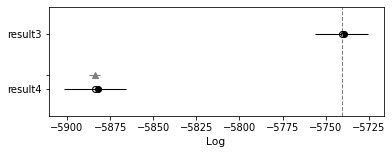

In [42]:
az.plot_compare(az.compare(df_dict))

## Excercise 3 - compare models with different numbers of predictors

    Compile model
    Compare models for 1, 2 and 3 predictors as in previous excercise


In [27]:
model5 = CmdStanModel(stan_file='code_5.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [46]:
data5 = dict(N = N,
            K = 5,
            y = np.linspace(0, 100, 1200),
            X = np.zeros([1200, 5]))

In [47]:
result5 = model5.sample(data = data5, chains = 4)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:03 Iteration:    1 / 2000 [  0%]  (Warmup)





chain 1 |█▎        | 00:07 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:11 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:14 Iteration:  300 / 2000 [ 15%]  (Warmup)

chain 1 |██▋       | 00:18 Iteration:  400 / 2000 [ 20%]  (Warmup)



chain 1 |███▏      | 00:23 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:27 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:31 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:36 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:40 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:45 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:50 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:55 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎ 


INFO:cmdstanpy:CmdStan done processing.


In [48]:
df5 = result5.draws_pd()
df5

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,sigma,beta[1],beta[2],...,y_hat[1191],y_hat[1192],y_hat[1193],y_hat[1194],y_hat[1195],y_hat[1196],y_hat[1197],y_hat[1198],y_hat[1199],y_hat[1200]
0,-5463.29,0.996943,0.891224,10.0,1023.0,0.0,5465.17,57.3547,-3.108300e+18,-4.057670e+18,...,-36.13920,143.295000,85.65150,-32.8419,-44.3936,38.170500,-16.9622,31.5567,-76.5360,-44.01730
1,-5463.24,0.973562,0.891224,10.0,1023.0,0.0,5466.87,57.9512,-1.554340e+18,-4.913790e+18,...,12.74080,-124.001000,-1.94319,-32.7321,12.1094,44.676100,51.0913,-67.6660,-29.0022,8.37874
2,-5463.41,0.945989,0.891224,10.0,1023.0,0.0,5466.73,58.4758,-2.213290e+18,-5.779520e+18,...,-38.78090,-17.639200,111.79800,-104.0280,40.9571,66.738100,-27.5544,13.3784,-30.2205,-19.51730
3,-5463.44,0.725854,0.891224,10.0,1023.0,0.0,5471.45,58.5458,-1.497580e+18,-5.948850e+18,...,47.08690,-71.185800,49.83470,46.4806,-64.5048,-38.105200,-17.0394,-3.1253,35.7373,22.81120
4,-5463.23,0.970971,0.891224,10.0,1023.0,0.0,5466.01,57.7511,-1.100380e+18,-6.032920e+18,...,1.21637,-0.517098,34.38180,25.4094,18.5751,-38.741400,36.5837,18.4490,73.1235,43.70460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-5464.94,0.803462,0.958983,10.0,1023.0,0.0,5467.74,60.0239,9.140140e+18,-3.785360e+18,...,51.37780,-82.410900,-14.29370,69.7810,157.2010,10.440300,18.5444,11.0757,-84.1594,55.27190
3996,-5464.83,0.998756,0.958983,10.0,1023.0,0.0,5467.01,59.9485,8.798710e+18,-4.123760e+18,...,-71.97320,-19.878300,-4.61941,14.4432,-13.4327,-31.285200,13.9276,-137.7980,12.2621,12.47010
3997,-5463.36,0.998814,0.958983,10.0,1023.0,0.0,5465.10,58.3737,8.820370e+18,-4.310510e+18,...,-28.42710,55.446500,-48.83890,-48.2753,34.6948,-46.404100,34.9313,-18.5216,-33.6179,33.32990
3998,-5463.23,0.999935,0.958983,10.0,1023.0,0.0,5466.82,57.8675,7.908310e+18,-4.436800e+18,...,-22.21840,117.485000,-114.25900,-117.5270,82.9039,0.083925,14.7266,-8.3011,121.9680,-71.25640


In [49]:
arviz_result5 = az.from_cmdstanpy(
    posterior=result5
)

In [50]:
df_dict2 = dict(result3= arviz_result3, result4= arviz_result4, result5= arviz_result5)

In [51]:
az.compare(df_dict2)

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
result3,0,-5740.688582,1.406271,0.000000,1.0,15.455706,0.000000,False,log
result4,1,-5883.828032,1.892174,143.139451,0.0,17.988976,3.229271,False,log
result5,2,-6570.691091,0.386989,830.002509,0.0,15.485431,18.923894,False,log


<AxesSubplot:xlabel='Log'>

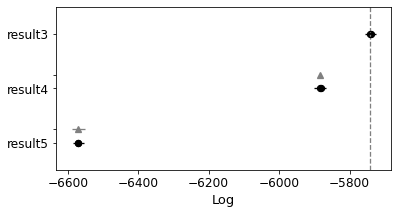

In [53]:
az.plot_compare(az.compare(df_dict2))